# data

In [5]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
chattogram_df = pd.read_csv("https://raw.githubusercontent.com/DryBoss/diarrhea-prediction-model/main/data/Chattogram.csv")
dhaka_df = pd.read_csv("https://raw.githubusercontent.com/DryBoss/diarrhea-prediction-model/main/data/Dhaka.csv")
khulna_df = pd.read_csv("https://raw.githubusercontent.com/DryBoss/diarrhea-prediction-model/main/data/Khulna.csv")
rajshahi_df = pd.read_csv("https://raw.githubusercontent.com/DryBoss/diarrhea-prediction-model/main/data/Rajshahi.csv")

In [3]:
# List of dataframes to process
dataframes = [chattogram_df, dhaka_df, khulna_df, rajshahi_df]

# Process each dataframe
for df in dataframes:
    # Ensure 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    """# Smooth each column (excluding 'Date') using a 30-day moving average
    for column in df.columns:
        if column != 'Date':  # Skip the 'Date' column
            smoothed_column = f'{column}_smooth'
            df[smoothed_column] = df[column].rolling(window=30).mean()"""


# statistical analysis



## Correlation Analysis

In [6]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Pearson Correlation (Linear Relationship)
print("Pearson Correlation Coefficients and p-values:")
for col in ["Minimum Temperature", "Maximum Temperature", "Humidity", "Preceptation"]:
    corr, p_value = stats.pearsonr(df["Diarrhea"], df[col])
    print(f"{col}: Correlation={corr:.3f}, p-value={p_value:.3f}")

# Spearman Correlation (Non-Linear Relationship)
print("\nSpearman Correlation Coefficients and p-values:")
for col in ["Minimum Temperature", "Maximum Temperature", "Humidity", "Preceptation"]:
    corr, p_value = stats.spearmanr(df["Diarrhea"], df[col])
    print(f"{col}: Correlation={corr:.3f}, p-value={p_value:.3f}")

Pearson Correlation Coefficients and p-values:
Minimum Temperature: Correlation=0.268, p-value=0.000
Maximum Temperature: Correlation=0.439, p-value=0.000
Humidity: Correlation=-0.231, p-value=0.000
Preceptation: Correlation=-0.044, p-value=0.248

Spearman Correlation Coefficients and p-values:
Minimum Temperature: Correlation=0.217, p-value=0.000
Maximum Temperature: Correlation=0.412, p-value=0.000
Humidity: Correlation=-0.155, p-value=0.000
Preceptation: Correlation=0.064, p-value=0.090


In [8]:
# Linear Regression (ANOVA/t-test)
formula = "Diarrhea ~ Q('Minimum Temperature') + Q('Maximum Temperature') + Q('Humidity') + Q('Preceptation')"
model = smf.ols(formula, data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Results:")
print(anova_results)


ANOVA Results:
                                 sum_sq     df          F        PR(>F)
Q('Minimum Temperature')     978.330308    1.0   2.592605  1.078151e-01
Q('Maximum Temperature')    9643.786952    1.0  25.556333  5.493376e-07
Q('Humidity')                224.281488    1.0   0.594353  4.410013e-01
Q('Preceptation')             49.642291    1.0   0.131554  7.169363e-01
Residual                  263770.516504  699.0        NaN           NaN


## time series

In [14]:
chattogram_df.set_index('Date', inplace=True)

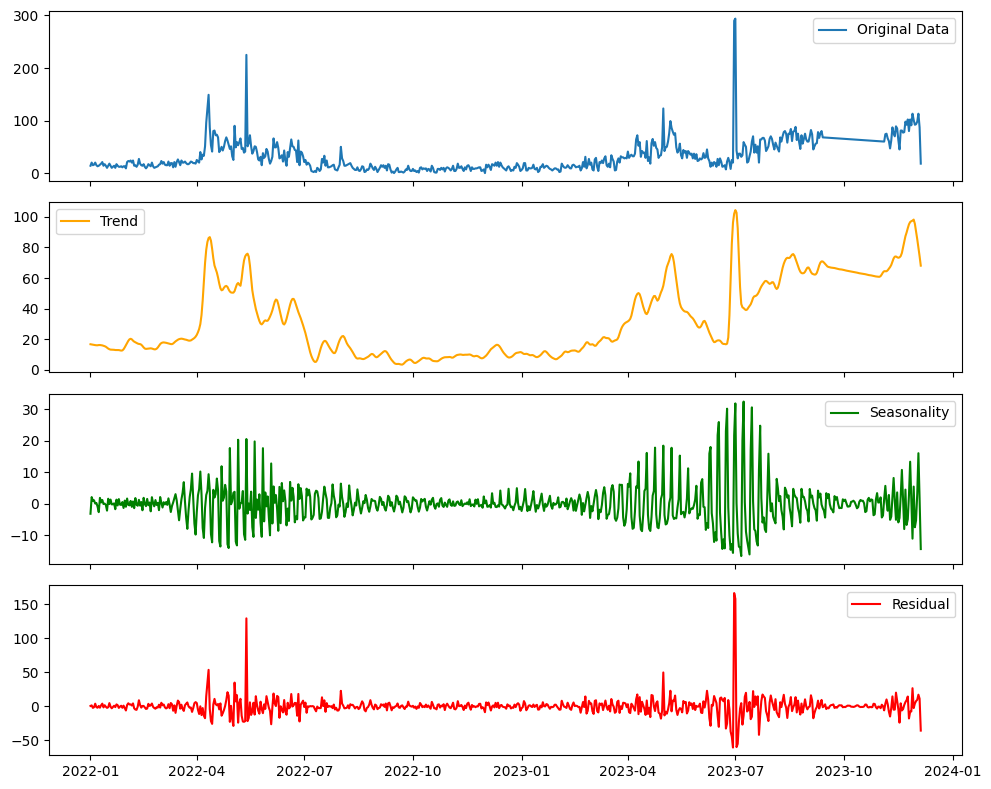

In [17]:
# Select the column for decomposition
series = chattogram_df['Diarrhea']

# Apply STL decomposition
stl = STL(series, seasonal=13)  # Adjust period based on data (e.g., 12 for monthly)
result = stl.fit()

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(series, label="Original Data")
axes[0].legend()

axes[1].plot(result.trend, label="Trend", color='orange')
axes[1].legend()

axes[2].plot(result.seasonal, label="Seasonality", color='green')
axes[2].legend()

axes[3].plot(result.resid, label="Residual", color='red')
axes[3].legend()

plt.tight_layout()
plt.show()


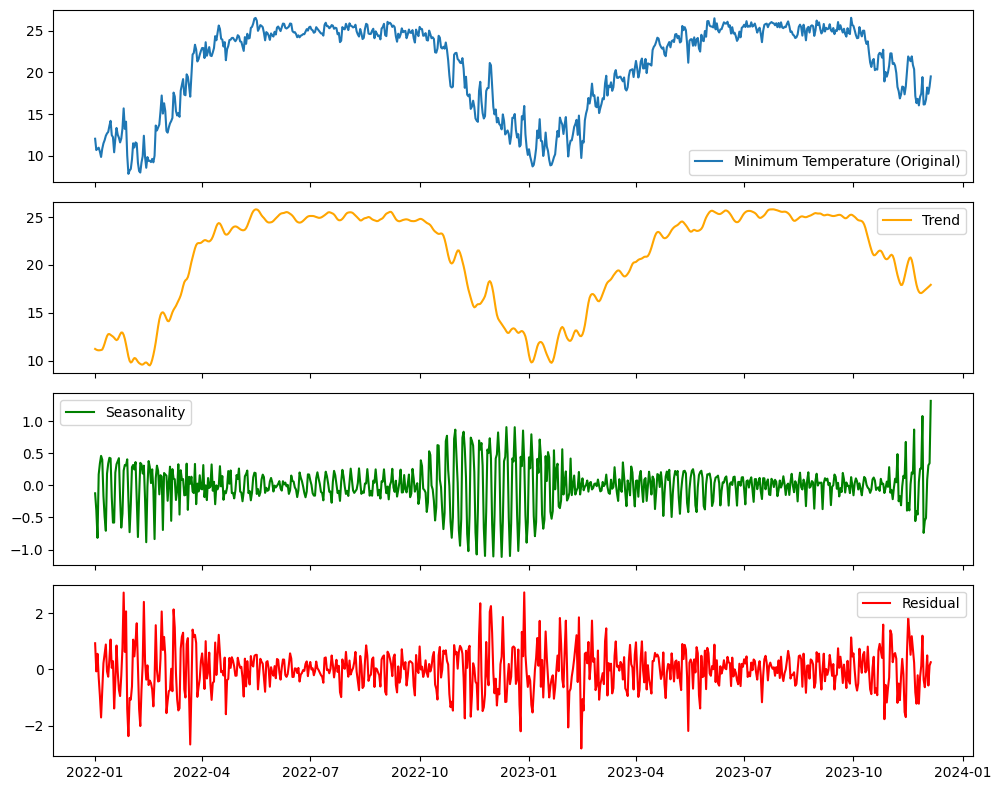

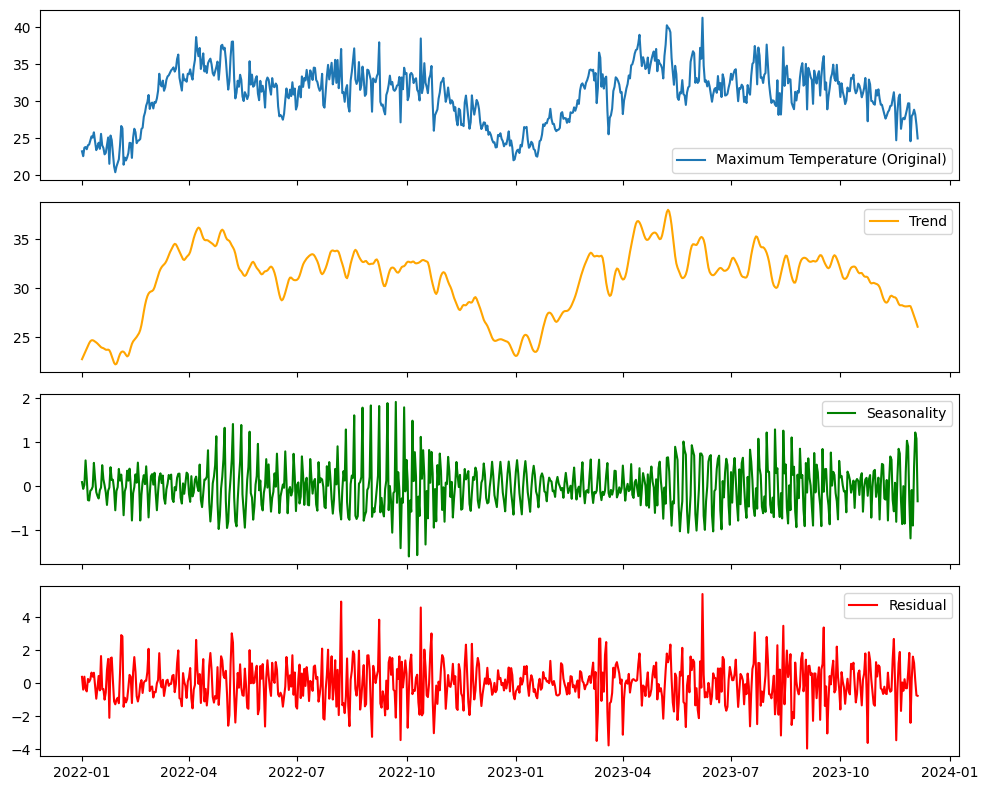

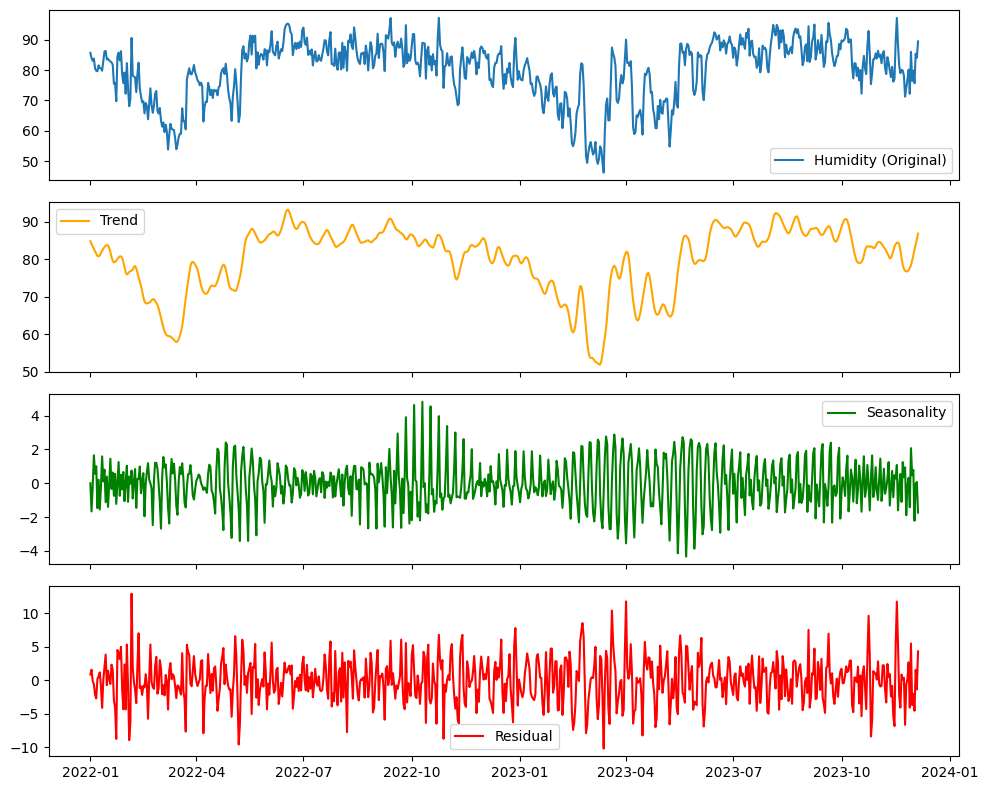

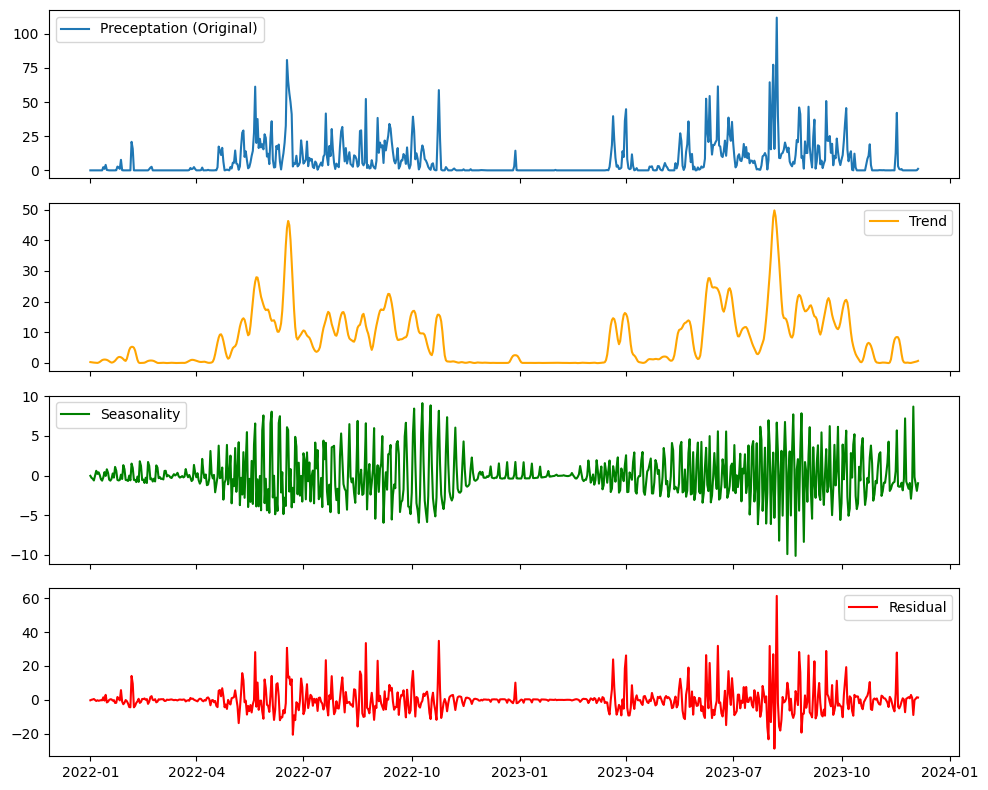

In [20]:
# Define environmental factors to analyze
factors = ['Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']

for factor in factors:
    series = chattogram_df[factor]

    stl = STL(series, seasonal=13)
    result = stl.fit()

    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    axes[0].plot(series, label=f"{factor} (Original)")
    axes[0].legend()

    axes[1].plot(result.trend, label="Trend", color='orange')
    axes[1].legend()

    axes[2].plot(result.seasonal, label="Seasonality", color='green')
    axes[2].legend()

    axes[3].plot(result.resid, label="Residual", color='red')
    axes[3].legend()

    plt.tight_layout()
    plt.show()


<ipython-input-23-6e4e6383049b>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


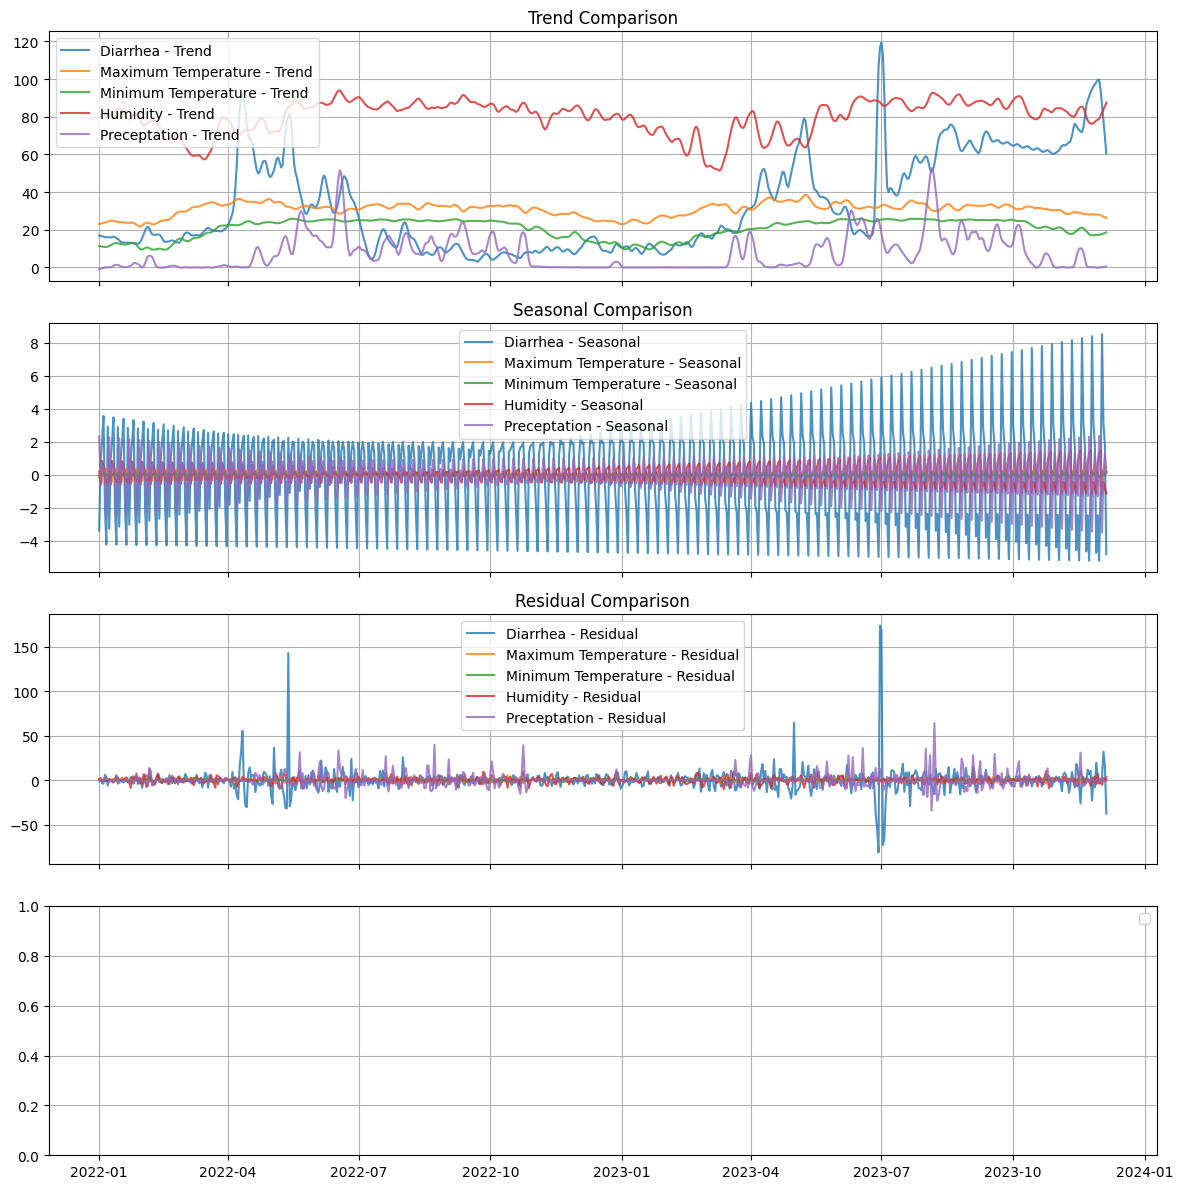

In [23]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Define columns to analyze
columns_to_analyze = ['Diarrhea', 'Maximum Temperature', 'Minimum Temperature', 'Humidity', 'Preceptation']

# Define period based on your dataset frequency
seasonal_period = 365  # Adjust if your data is daily, weekly, or monthly

# Create a figure for visualization
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

for col in columns_to_analyze:
    # Drop NaN values for clean decomposition
    series = chattogram_df[col].dropna()

    # Perform STL decomposition
    stl = STL(series, seasonal=seasonal_period)
    result = stl.fit()

    # Plot each component on the same subplot
    axes[0].plot(result.trend, label=f'{col} - Trend', alpha=0.8)
    axes[1].plot(result.seasonal, label=f'{col} - Seasonal', alpha=0.8)
    axes[2].plot(result.resid, label=f'{col} - Residual', alpha=0.8)

# Add legends and labels
axes[0].set_title("Trend Comparison")
axes[1].set_title("Seasonal Comparison")
axes[2].set_title("Residual Comparison")

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
